In [27]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import time
import illustris_python_mod as il
import sys
import os
sys.path.append('../BH_dynamics_analysis')
sys.path.append('/home/pranavsatheesh/arepo_package/')
import arepo_package as arepo
from scipy.spatial import cKDTree

from tqdm import tqdm

In [28]:
# import illustris_python_mod as il
# print(il.__file__)

## Loading the run and BH merger file

In [29]:
basePath = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'

In [30]:
basePath_DF = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3/'

In [36]:
arepo.get_cosmology(basePath_DF)

ValueError: invalid literal for int() with base 10: '023_postprocessed'

In [17]:
basePath='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/'
runname='output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3'

In [20]:
basePath+runname+'/'

'/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3/'

In [25]:
arepo.get_cosmology(basePath_DF)[2]

ValueError: invalid literal for int() with base 10: '023_postprocessed'

In [18]:
arepo.get_cosmology(basePath+runname+'/')

ValueError: invalid literal for int() with base 10: '023_postprocessed'

In [15]:
h = arepo.get_cosmology(basePath)[2]
N_snaps = 32
snaps = np.arange(0,N_snaps+1,1)

In [7]:
merger_properties=np.load(basePath + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]
print(merger_properties.keys())
true_merger_flag  = np.array(merger_properties['merger_type'])==1

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])


In [8]:
true_merger_flag  = np.array(merger_properties['merger_type'])==1
M2 = np.array(merger_properties['BH_Mass2'])[true_merger_flag]
M1 = np.array(merger_properties['BH_Mass1'])[true_merger_flag]

In [9]:
mass_ratios = np.where(M2 < M1, M2 / M1, M1 / M2)
np.sum(mass_ratios>0.1)

455

In [10]:
def show_mergers_hist(bh_merger_properties):
    true_merger_flag  = np.array(bh_merger_properties['merger_type'])==1
    merger_z = np.array(bh_merger_properties['remnant_redshift'])[true_merger_flag]
    fig,ax = plt.subplots(1,1,figsize=[5,3])
    ax.hist(merger_z, bins=9,histtype="step")
    ax.set_xlabel("z")
    ax.set_ylabel("Number of mergers")
    ax.set_title("Mergers in BRAHMA")
    #fig.show()
    
    N_mergers = np.sum(true_merger_flag)
    print("The number of BH mergers in this run is %d"%(N_mergers))
    return fig,ax

The number of BH mergers in this run is 559


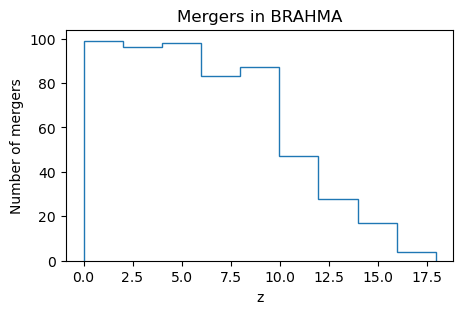

In [11]:
fig,ax = show_mergers_hist(merger_properties)

These are the mergers in the run without DF - just repositioning added

In [12]:
def get_snapshots_to_bh_mergers(basePath):
    
    snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)
    snap_numbers = []
    
    brahma_merger_data=np.load(basePath + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]

    for remnant_redshift in brahma_merger_data['remnant_redshift']:
        idx = np.where(z_list == remnant_redshift)[0]
        snap_numbers.append(snap_list[idx[0]])
    
    return snap_numbers

In [13]:
snap_mergers = get_snapshots_to_bh_mergers(basePath)
snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)

## Connecting BH merger file to treedata

These are BRAHMA runs with the 10^5 Msolar seed, LW10 criteria, so more linent seed formation criteria

In [14]:
basePath_DF = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3/'
basePath = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'

In [15]:
snap_num = 0
h = il.groupcat.loadHeader(basePath_DF, snap_num)['HubbleParam']
Box_l = il.groupcat.loadHeader(basePath_DF,snap_num)['BoxSize']/1000/h
redshifts  =np.array([il.groupcat.loadHeader(basePath, snap)['Redshift'] for snap in snaps])
print("Max redshift: %d"%(redshifts[0]))
print("Box length : %1.3f Mpc"%(Box_l))

Max redshift: 25
Box length : 18.461 Mpc


### For the DF run

The number of BH mergers in this run is 2990


(<Figure size 500x300 with 1 Axes>,
 <Axes: title={'center': 'Mergers in BRAHMA'}, xlabel='z', ylabel='Number of mergers'>)

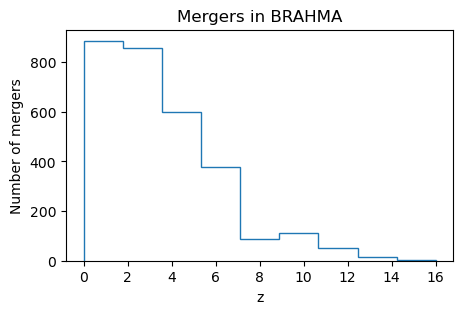

In [16]:
bh_merger_properties=np.load(basePath_DF + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]
show_mergers_hist(bh_merger_properties)

In [17]:
merger_properties=np.load(basePath_DF + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]
print(merger_properties.keys())
true_merger_flag  = np.array(merger_properties['merger_type'])==1
print("There are %d mergers in this run"%(np.sum(true_merger_flag)))
Nmergers = np.sum(true_merger_flag)
true_merger_flag  = np.array(merger_properties['merger_type'])==1
M2 = np.array(merger_properties['BH_Mass2'])[true_merger_flag]
M1 = np.array(merger_properties['BH_Mass1'])[true_merger_flag]

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])
There are 2990 mergers in this run


In [18]:
snapshots_DF = get_snapshots_to_bh_mergers(basePath_DF)
snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath_DF)

In [19]:
merger_remnant_snap = []
merger_remnant_z = np.array(merger_properties['remnant_redshift'])[true_merger_flag]
merger_remnant_SubhaloID = np.array(merger_properties['remnant_SubhaloID'])[true_merger_flag]

for remnant_redshift in merger_remnant_z:
    idx = np.where(z_list == remnant_redshift)[0]
    merger_remnant_snap.append(snap_list[idx[0]])

In [20]:
tree=h5py.File(basePath_DF+'postprocessing/tree_extended.hdf5','r')
SubfindID=tree.get('SubfindID')[:]
FirstProgenitorID=tree.get('FirstProgenitorID')[:]
NextProgenitorID=tree.get('NextProgenitorID')[:]
DescendantID=tree.get('DescendantID')[:]
SnapNum=tree.get('SnapNum')[:]
SubhaloID=tree.get('SubhaloID')[:]

In [21]:
def print_tree_details_for_bh_merger(tree,i):
    tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    print("SubhaloID:",SubhaloID[tree_target_index])
    print("FpID:",FirstProgenitorID[tree_target_index])
    print("npID:",NextProgenitorID[tree_target_index])
    print("dID:",DescendantID[tree_target_index])
    print("snap at BH merger:",SnapNum[tree_target_index])
    
def print_tree_details(tree,tree_target_index):

    print("SubhaloID:",SubhaloID[tree_target_index])
    print("FpID:",FirstProgenitorID[tree_target_index])
    print("npID:",NextProgenitorID[tree_target_index])
    print("dID:",DescendantID[tree_target_index])
    print("snap at BH merger:",SnapNum[tree_target_index])

In [ ]:
valid_mergers = 0
invalid_mergers = 0
invalid_mergers_with_no_progenitor = 0
mass_ratio_valid = []
mass_ratio_invalid = []
valid_merger_indices = []

for i in range(Nmergers):
    #print("Processing merger %d of %d"%(i+1,Nmergers))
    #tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    #print(i)
    tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[i]) & (SnapNum == merger_remnant_snap[i]))
    if len(tree_target_index[0]) != 0:
        tree_target_index = tree_target_index[0][0]  
        fpID = FirstProgenitorID[tree_target_index]
        if fpID !=-1:
            fpIndex = np.where(SubhaloID==fpID)[0][0]
            npID = NextProgenitorID[fpIndex]
            if npID != -1:
                valid_mergers = valid_mergers + 1
                valid_merger_indices.append(i)
                #mass_ratio_valid.append(mass_ratios[i])
            else:
                invalid_mergers = invalid_mergers + 1
                #mass_ratio_invalid.append(mass_ratios[i])
        else:
            invalid_mergers_with_no_progenitor = invalid_mergers_with_no_progenitor + 1


print("There are %d valid BH mergers with fpIDs != -1 and npIDs != -1"%(valid_mergers))
print("There are %d invalid BH mergers with fpIDs != -1 and npIDs = -1"%(invalid_mergers))
print("There are %d invalid BH mergers with fpIDs = -1"%(invalid_mergers_with_no_progenitor))

There are 2359 valid BH mergers with fpIDs != -1 and npIDs != -1
There are 539 invalid BH mergers with fpIDs != -1 and npIDs = -1
There are 92 invalid BH mergers with fpIDs = -1


### Valid merger properties

In [44]:
valid_merger_properties = {}
for key in merger_properties.keys():
    valid_merger_properties[key] = np.array(merger_properties[key])[true_merger_flag][valid_merger_indices]

In [ ]:
merger_file_loc = '/home/pranavsatheesh/host_galaxies/data/merger_files/'
np.save(merger_file_loc + 'brahma_merger_file_output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3.npy',valid_merger_properties)

In [5]:
merger_file_loc = '/home/pranavsatheesh/host_galaxies/data/merger_files/'
merger_prop = np.load(merger_file_loc + 'brahma_merger_file_output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3.npy',allow_pickle=True).item()

In [6]:
merger_prop.keys()

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])

In [8]:
len(np.logical_and(np.array(merger_prop['merger_type']) == 1,
                                           np.array(merger_prop['remnant_SubhaloStellarMass']) > 0))

2359

(array([1449.,  380.,  160.,  111.,   67.,   47.,   42.,   19.,   24.,
          60.]),
 array([5.47039615, 5.79620761, 6.12201908, 6.44783054, 6.77364201,
        7.09945347, 7.42526493, 7.7510764 , 8.07688786, 8.40269933,
        8.72851079]),
 [<matplotlib.patches.Polygon at 0x150e4700f7f0>])

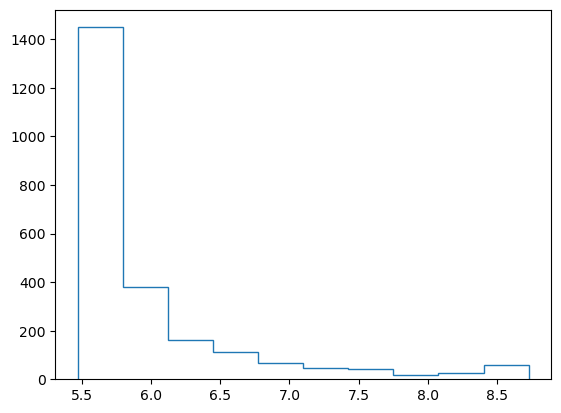

In [77]:
plt.hist(np.log10(merger_prop['BH_Mass1']* 1e10 / h + merger_prop['BH_Mass2']* 1e10 / h),histtype="step")

In [ ]:
'remnant_SubhaloStellarMass'

(array([585., 593., 517., 331., 188.,  82.,  41.,  14.,   6.,   2.]),
 array([ 0.        ,  1.61669574,  3.23339149,  4.85008723,  6.46678297,
         8.08347872,  9.70017446, 11.3168702 , 12.93356595, 14.55026169,
        16.16695743]),
 [<matplotlib.patches.Polygon at 0x150e4bb24e20>])

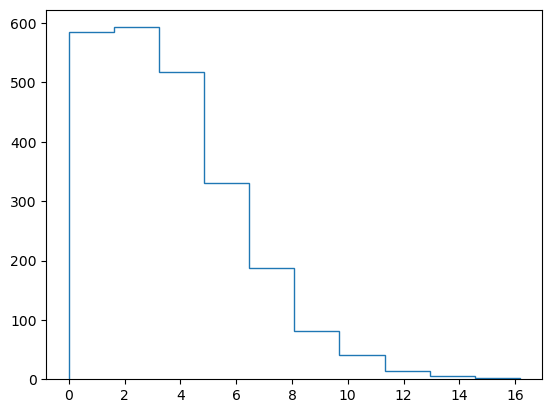

In [70]:
plt.hist(merger_prop['merger_redshift'],histtype="step")

In [43]:
len(valid_merger_indices)

2359

In [22]:
snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath_DF)
def get_z_from_snap(snap_input):
    z_output = z_list[np.where(snap_list==snap_input)[0][0]]
    return z_output

In [23]:
# find all cases where FpIDs = -1 
fpID_minus_1_count = 0
fpID_minus_1_npID_not_minus_1_count = 0
fpID_not_minus1_but_npID_minus1_count = 0


fpIDs_merger = []
npIDs_merger = []
snap_subhalo_merger = []
z_subhalo_merger = []


snap_subhalo_remnant = []
z_subhalo_remnant = []
snap_bh_merger = []
z_bh_merger = []
remnant_subfind_bh_merger = []

no_merger = 0
no_merger_index = []

bh_and_subhalo_merger_snap_list = {'subhalo_mrg_remnant':[],'bh_merger':[],'index':[]}
bh_and_subhalo_merger_z_list = {'subhalo_mrg_remnant':[],'bh_merger':[],'index':[]}

for i in range(Nmergers):
    #print("Processing merger %d of %d"%(i+1,Nmergers))
    #tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    #print(i)
    tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[i]) & (SnapNum == merger_remnant_snap[i]))
    if len(tree_target_index[0]) != 0:
        tree_target_index = tree_target_index[0][0]  
        fpID = FirstProgenitorID[tree_target_index]
        
        if fpID ==-1:
            fpIDs_merger.append(fpID)
            fpID_minus_1_count += 1
            npID = NextProgenitorID[tree_target_index]

            new_target_index = tree_target_index
            if(npID != -1):
                #fpID_minus_1_npID_not_minus_1_count += 1
                #npIDs_merger.append(npID)
                
                #the subhalo is merging with the next progenitor in this snapshot. The descendant subhalo is the merger remnant.
                descID = DescendantID[new_target_index]
                if descID == -1:
                    print(i,"confused!")
                else:
                    subhalo_remnant_index = np.where(SubhaloID==descID)[0][0]

                    bh_and_subhalo_merger_snap_list['subhalo_mrg_remnant'].append(SnapNum[subhalo_remnant_index])
                    bh_and_subhalo_merger_snap_list['bh_merger'].append(merger_remnant_snap[i])
                    bh_and_subhalo_merger_snap_list['index'].append(i)

                    bh_and_subhalo_merger_z_list['subhalo_mrg_remnant'].append(get_z_from_snap(SnapNum[subhalo_remnant_index]))
                    bh_and_subhalo_merger_z_list['bh_merger'].append(get_z_from_snap(merger_remnant_snap[i]))
                    bh_and_subhalo_merger_z_list['index'].append(i)

                    # snap_subhalo_remnant.append(SnapNum[subhalo_remnant_index])
                    # z_subhalo_remnant.append(get_z_from_snap(SnapNum[subhalo_remnant_index]))
                    # snap_bh_merger.append(merger_remnant_snap[i])
                    # z_bh_merger.append(get_z_from_snap(merger_remnant_snap[i]))
                    # remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
                    #print(i,SnapNum[subhalo_remnant_index],merger_remnant_snap[i])
                #snap_subhalo_merger.append(SnapNum[tree_target_index])
                #z_subhalo_merger.append(get_z_from_snap(SnapNum[tree_target_index]))

            else:
                #there is no next progenitor for the target subhalo. Hence, we will look at the descendant subhalo
                #and see if it has a next progenitor
                new_target_index = tree_target_index

                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #no descendant found for this merger
                        #print("No descendant found for this merger")
                        no_merger += 1
                        no_merger_index.append(i)
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]
                
                #npIDs_merger.append(npID)

                descID = DescendantID[new_target_index]
                if descID!=-1:
                
                    subhalo_remnant_index = np.where(SubhaloID==descID)[0][0]
                    bh_and_subhalo_merger_snap_list['subhalo_mrg_remnant'].append(SnapNum[subhalo_remnant_index])
                    bh_and_subhalo_merger_snap_list['bh_merger'].append(merger_remnant_snap[i])
                    bh_and_subhalo_merger_snap_list['index'].append(i)

                    bh_and_subhalo_merger_z_list['subhalo_mrg_remnant'].append(get_z_from_snap(SnapNum[subhalo_remnant_index]))
                    bh_and_subhalo_merger_z_list['bh_merger'].append(get_z_from_snap(merger_remnant_snap[i]))
                    bh_and_subhalo_merger_z_list['index'].append(i)

                    # snap_subhalo_remnant.append(SnapNum[subhalo_remnant_index])
                    # z_subhalo_remnant.append(get_z_from_snap(SnapNum[subhalo_remnant_index]))
                    # snap_bh_merger.append(merger_remnant_snap[i])
                    # z_bh_merger.append(get_z_from_snap(merger_remnant_snap[i]))


                        #z_subhalo_merger.append(get_z_from_snap(SnapNum[new_target_index]))

        else:
            #check if the npID is minus -1 at fp
            fpIndex = np.where(SubhaloID==fpID)[0][0]
            npID = NextProgenitorID[fpIndex]
            
            if npID == -1:
                #There is only one progenitor! Maybe there is a next progenitor merging with it on the same snapshot?
                npID = NextProgenitorID[tree_target_index]
                new_target_index = tree_target_index
                #fpID_not_minus1_but_npID_minus1_count += 1
                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #print("No descendant found for this merger")
                        no_merger += 1
                        no_merger_index.append(i)
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]

                descID = DescendantID[new_target_index]
                if descID!=-1:

                    subhalo_remnant_index = np.where(SubhaloID==descID)[0][0]
                    bh_and_subhalo_merger_snap_list['subhalo_mrg_remnant'].append(SnapNum[subhalo_remnant_index])
                    bh_and_subhalo_merger_snap_list['bh_merger'].append(merger_remnant_snap[i])
                    bh_and_subhalo_merger_snap_list['index'].append(i)

                    bh_and_subhalo_merger_z_list['subhalo_mrg_remnant'].append(get_z_from_snap(SnapNum[subhalo_remnant_index]))
                    bh_and_subhalo_merger_z_list['bh_merger'].append(get_z_from_snap(merger_remnant_snap[i]))
                    bh_and_subhalo_merger_z_list['index'].append(i)

                    # snap_subhalo_remnant.append(SnapNum[subhalo_remnant_index])
                    # z_subhalo_remnant.append(get_z_from_snap(SnapNum[subhalo_remnant_index]))
                    # snap_bh_merger.append(merger_remnant_snap[i])
                    # z_bh_merger.append(get_z_from_snap(merger_remnant_snap[i]))


                # snap_bh_merger.append(merger_remnant_snap[i])
                # z_bh_merger.append(get_z_from_snap(merger_remnant_snap[i]))
                # remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
                # new_target_index = tree_target_index
                # while npID==-1:
                #     descID = DescendantID[new_target_index]
                #     if descID == -1:
                #         #print("No descendant found for this merger")
                #         no_merger += 1
                #         no_merger_index.append(i)
                #         break
                #     else:
                #         new_target_index = np.where(SubhaloID==descID)[0][0]
                #         npID = NextProgenitorID[new_target_index]
                # npIDs_merger.append(npID)
                # snap_subhalo_merger.append(SnapNum[new_target_index])
                # z_subhalo_merger.append(get_z_from_snap(SnapNum[tree_target_index]))

# print("There are %d BH mergers with fpIDs = -1"%(fpID_minus_1_count))
# print("There are %d BH mergers with fpIDs = -1 and npIDs != -1"%(fpID_minus_1_npID_not_minus_1_count))   
# print("There are %d BH mergers with fpIDs != -1 but npIDs = -1"%(fpID_not_minus1_but_npID_minus1_count))

In [26]:
found = False
tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[6]) & (SnapNum == merger_remnant_snap[6]))
print(tree_target_index)
if len(tree_target_index[0]) != 0:
    tree_target_index = tree_target_index[0][0]  
    fpID = FirstProgenitorID[tree_target_index]
    print(fpID)
  
    fpIndex = np.where(SubhaloID==fpID)[0][0]
    npID = NextProgenitorID[fpIndex]
    print(npID)
    if npID == -1:
    #             fpID_not_minus1_but_npID_minus1_count += 1
        print("snap_bh_merger %d"%(merger_remnant_snap[6]))
        print("z_bh_merger %2.3f"%(get_z_from_snap(merger_remnant_snap[6])))
    #             remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])

        new_target_index = tree_target_index
        while npID==-1:
            descID = DescendantID[new_target_index]
            print(descID)
            if descID == -1:
                print("No descendant found for this merger")
                break
    #                     no_merger += 1
    #                     no_merger_index.append(i)
                
            else:
                new_target_index = np.where(SubhaloID==descID)[0][0]
                npID = NextProgenitorID[new_target_index]
    #             npIDs_merger.append(npID)
                print(npID)
                print(FirstProgenitorID[new_target_index])
                print("snap_subhalo_merger is %3.3f"%(SnapNum[new_target_index]))
                print("z_subhalo_merger is %3.3e"%(get_z_from_snap(SnapNum[tree_target_index])))
            if found:
                pass

(array([132993]),)
132994
-1
snap_bh_merger 31
z_bh_merger 0.099
132992
-1
132993
snap_subhalo_merger is 32.000
z_subhalo_merger is 9.940e-02
-1
No descendant found for this merger


In [27]:
snap_diff = np.array(bh_and_subhalo_merger_snap_list['subhalo_mrg_remnant']) - np.array(bh_and_subhalo_merger_snap_list['bh_merger'])

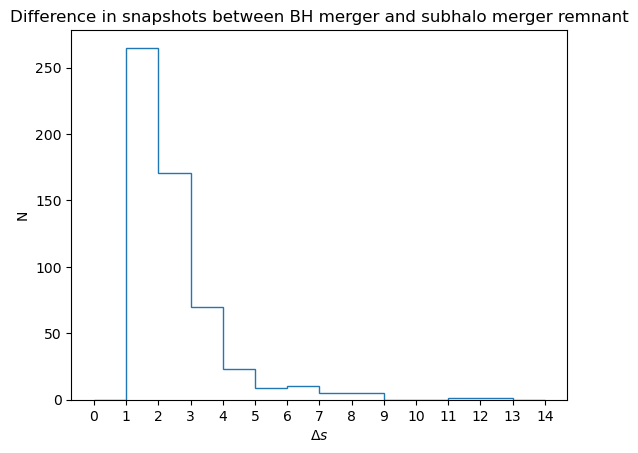

In [82]:
snap_diff_x = np.arange(0,15,1)
snap_diff_count = np.histogram(snap_diff,bins=snap_diff_x)
#plt.step(snap_diff_x[:-1],snap_diff_count[0],where='post')
plt.hist(snap_diff, bins=snap_diff_x,histtype="step")
plt.xticks(snap_diff_x)
plt.title("Difference in snapshots between BH merger and subhalo merger remnant")
plt.xlabel("$\Delta s$")
plt.ylabel("N")
plt.show()

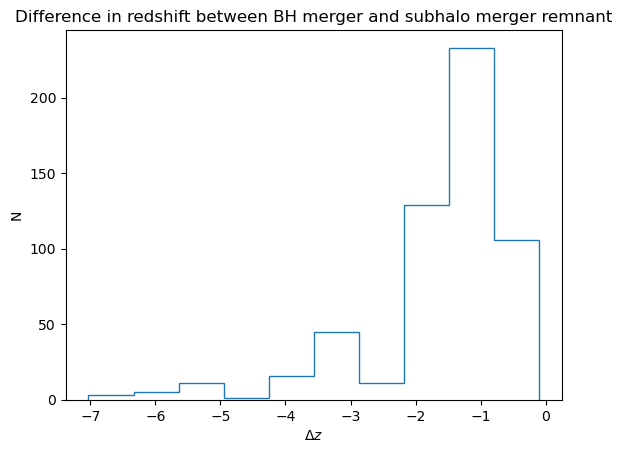

In [83]:
z_diff = np.array(bh_and_subhalo_merger_z_list['subhalo_mrg_remnant']) - np.array(bh_and_subhalo_merger_z_list['bh_merger'])
plt.hist(z_diff, bins=10,histtype="step")
plt.title("Difference in redshift between BH merger and subhalo merger remnant")
plt.xlabel("$\Delta z$")
plt.ylabel("N")
plt.show()

Text(0.5, 0.98, 'Difference in snapshot(redshift) between BH merger and subhalo merger remnant')

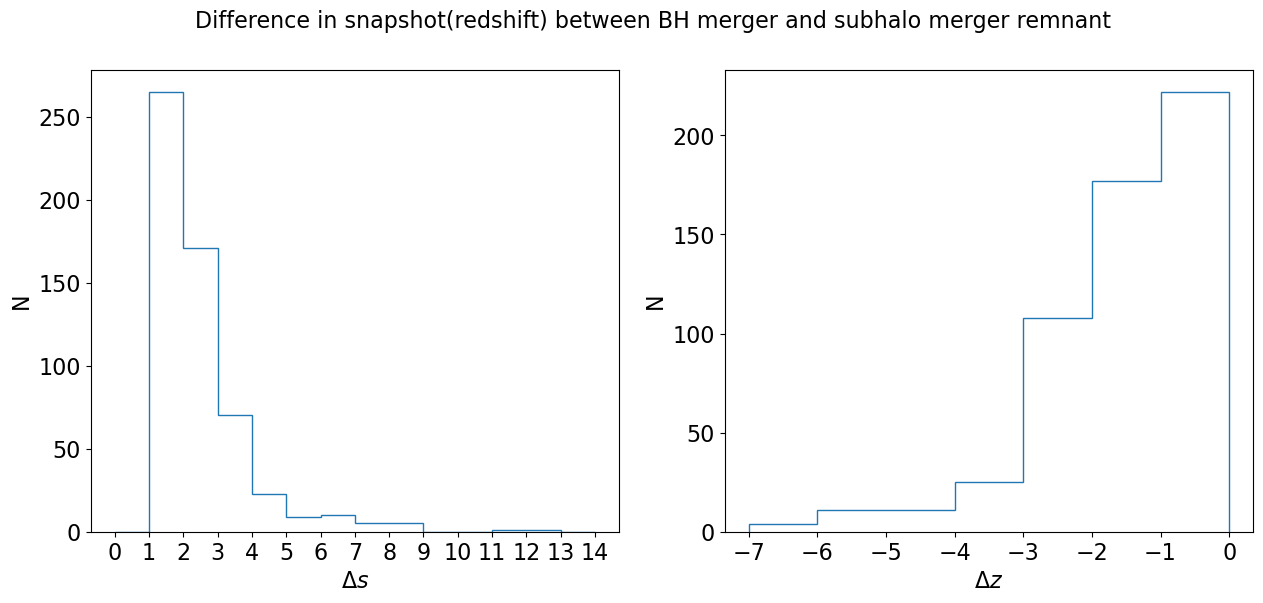

In [118]:
fig,axes = plt.subplots(1,2,figsize=[15,6])

snap_diff_x = np.arange(0,15,1)
snap_diff_count = np.histogram(snap_diff,bins=snap_diff_x)
#plt.step(snap_diff_x[:-1],snap_diff_count[0],where='post')
axes[0].hist(snap_diff, bins=snap_diff_x,histtype="step")
axes[0].set_xticks(snap_diff_x)
#axes[0].set_title("Difference in snapshots between BH merger and subhalo merger remnant")
axes[0].set_xlabel("$\Delta s$",fontsize=16)
axes[0].set_ylabel("N",fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)

z_diff = np.array(bh_and_subhalo_merger_z_list['subhalo_mrg_remnant']) - np.array(bh_and_subhalo_merger_z_list['bh_merger'])
axes[1].hist(z_diff, bins=np.arange(-7,1,1),histtype="step")
axes[1].tick_params(axis='both', labelsize=16)
axes[1].set_xticks(np.arange(-7,1,1))
axes[1].set_xlabel("$\Delta z$",fontsize=16)
axes[1].set_ylabel("N",fontsize=16)


fig.suptitle("Difference in snapshot(redshift) between BH merger and subhalo merger remnant",fontsize=16)

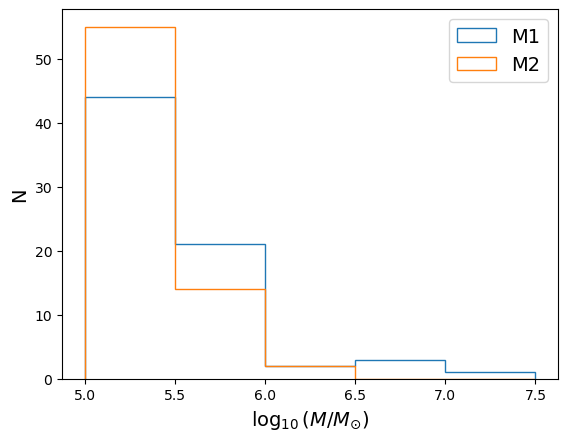

In [81]:
plt.hist(np.array(snap_subhalo_merger)-np.array(snap_bh_merger), histtype="step", bins=8)
plt.xticks(np.arange(0, 20, 2), fontsize=16)
plt.yticks(fontsize=16)
plt.title("Difference in snapshots between subhalo and BH merger")
plt.xlabel("$\\Delta s$", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### For the run with repositioning

The number of BH mergers in this run is 559


(<Figure size 500x300 with 1 Axes>,
 <Axes: title={'center': 'Mergers in BRAHMA'}, xlabel='z', ylabel='Number of mergers'>)

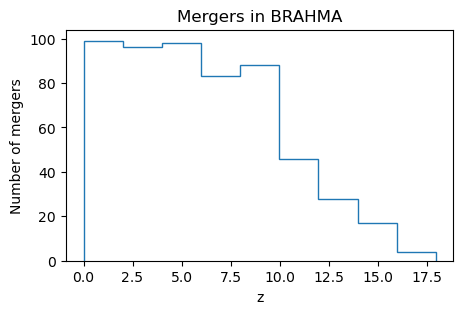

In [48]:
bh_merger_properties=np.load(basePath + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]
show_mergers_hist(bh_merger_properties)


In [49]:
merger_properties=np.load(basePath + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]
print(merger_properties.keys())
true_merger_flag  = np.array(merger_properties['merger_type'])==1
print("There are %d mergers in this run"%(np.sum(true_merger_flag)))
Nmergers = np.sum(true_merger_flag)

snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)

snapshots = get_snapshots_to_bh_mergers(basePath)
merger_remnant_snap = []
merger_remnant_z = np.array(merger_properties['remnant_redshift'])[true_merger_flag]
merger_remnant_SubhaloID = np.array(merger_properties['remnant_SubhaloID'])[true_merger_flag]

for remnant_redshift in merger_remnant_z:
    idx = np.where(z_list == remnant_redshift)[0]
    merger_remnant_snap.append(snap_list[idx[0]])

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])
There are 559 mergers in this run


In [50]:
tree=h5py.File(basePath+'postprocessing/tree_extended.hdf5','r')
SubfindID=tree.get('SubfindID')[:]
FirstProgenitorID=tree.get('FirstProgenitorID')[:]
NextProgenitorID=tree.get('NextProgenitorID')[:]
DescendantID=tree.get('DescendantID')[:]
SnapNum=tree.get('SnapNum')[:]
SubhaloID=tree.get('SubhaloID')[:]

In [51]:
# find all cases where FpIDs = -1 
fpID_minus_1_count = 0
fpID_minus_1_npID_not_minus_1_count = 0
fpID_not_minus1_but_npID_minus1_count = 0


fpIDs_merger = []
npIDs_merger = []
snap_subhalo_merger = []
snap_bh_merger = []
remnant_subfind_bh_merger = []

no_merger = 0


for i in range(Nmergers):
    #print("Processing merger %d of %d"%(i+1,Nmergers))
    #tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    #print(i)
    tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[i]) & (SnapNum == merger_remnant_snap[i]))
    if len(tree_target_index[0]) != 0:
        tree_target_index = tree_target_index[0][0]  
        fpID = FirstProgenitorID[tree_target_index]
        if fpID ==-1:
            fpIDs_merger.append(fpID)
            fpID_minus_1_count += 1
            npID = NextProgenitorID[tree_target_index]
            snap_bh_merger.append(merger_remnant_snap[i])
            remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
            if(npID != -1):
                fpID_minus_1_npID_not_minus_1_count += 1
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[tree_target_index])
            else:
                new_target_index = tree_target_index
                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #print("No descendant found for this merger")
                        no_merger += 1
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[new_target_index])

        else:
            #check if the npID is minus -1 at fp
            fpIndex = np.where(SubhaloID==fpID)[0][0]
            npID = NextProgenitorID[fpIndex]
            if npID == -1:
                fpID_not_minus1_but_npID_minus1_count += 1
                snap_bh_merger.append(merger_remnant_snap[i])
                remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
                new_target_index = tree_target_index
                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #print("No descendant found for this merger")
                        no_merger += 1
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[new_target_index])

print("There are %d BH mergers with fpIDs = -1"%(fpID_minus_1_count))
print("There are %d BH mergers with fpIDs = -1 and npIDs != -1"%(fpID_minus_1_npID_not_minus_1_count))   
print("There are %d BH mergers with fpIDs != -1 but npIDs = -1"%(fpID_not_minus1_but_npID_minus1_count))

There are 34 BH mergers with fpIDs = -1
There are 1 BH mergers with fpIDs = -1 and npIDs != -1
There are 381 BH mergers with fpIDs != -1 but npIDs = -1


In [54]:
valid_mergers = 0
invalid_mergers = 0
mass_ratio_valid = []
mass_ratio_invalid = []

for i in range(Nmergers):
    #print("Processing merger %d of %d"%(i+1,Nmergers))
    #tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    #print(i)
    tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[i]) & (SnapNum == merger_remnant_snap[i]))
    if len(tree_target_index[0]) != 0:
        tree_target_index = tree_target_index[0][0]  
        fpID = FirstProgenitorID[tree_target_index]
        if fpID !=-1:
            fpIndex = np.where(SubhaloID==fpID)[0][0]
            npID = NextProgenitorID[fpIndex]
            if npID != -1:
                valid_mergers = valid_mergers + 1
                #mass_ratio_valid.append(mass_ratios[i])
            else:
                invalid_mergers = invalid_mergers + 1
                #mass_ratio_invalid.append(mass_ratios[i])


print("There are %d valid BH mergers with fpIDs != -1 and npIDs != -1"%(valid_mergers))
print("There are %d invalid BH mergers with fpIDs != -1 and npIDs = -1"%(invalid_mergers))

There are 134 valid BH mergers with fpIDs != -1 and npIDs != -1
There are 381 invalid BH mergers with fpIDs != -1 and npIDs = -1


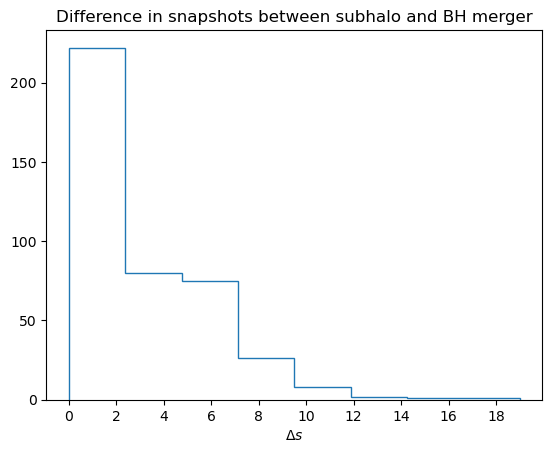

In [52]:
plt.hist(np.array(snap_subhalo_merger)-np.array(snap_bh_merger),histtype="step",bins=8)
plt.xticks(np.arange(0,20,2))
plt.title("Difference in snapshots between subhalo and BH merger")
plt.xlabel("$\Delta s$")
plt.show()

## fpID is equal to -1
The subhalo containing the BHs have no progenitors which means the BHs have merged but the subhalo hasn't. Look for the next progenitor of this subhalo and the descendent of them would be the post merger subhalo.

In [26]:
print_tree_details_for_bh_merger(tree,27)

SubhaloID: [300000031000000004]
FpID: [-1]
npID: [300000031000000005]
dID: [300000031000000003]
snap at BH merger: [21]


In this case the npID is not -1 and therefore the merger is happening right here and the descendant is the post merger subhalo. 

In [27]:
print_tree_details(tree,np.where(SubhaloID==300000031000000003)[0][0])

SubhaloID: 300000031000000003
FpID: 300000031000000004
npID: -1
dID: 300000031000000002
snap at BH merger: 22


In [28]:
np.where((SubfindID == merger_remnant_SubhaloID[529]) & (SnapNum == merger_remnant_snap[529]))[0]

array([184212])

In [29]:
# find all cases where FpIDs = -1 
fpID_minus_1_count = 0
fpID_minus_1_npID_not_minus_1_count = 0
fpID_not_minus1_but_npID_minus1_count = 0


fpIDs_merger = []
npIDs_merger = []
snap_subhalo_merger = []
snap_bh_merger = []
remnant_subfind_bh_merger = []

no_merger = 0


for i in range(Nmergers):
    #print("Processing merger %d of %d"%(i+1,Nmergers))
    #tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    #print(i)
    tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[i]) & (SnapNum == merger_remnant_snap[i]))
    if len(tree_target_index[0]) != 0:
        tree_target_index = tree_target_index[0][0]  
        fpID = FirstProgenitorID[tree_target_index]
        if fpID ==-1:
            fpIDs_merger.append(fpID)
            fpID_minus_1_count += 1
            npID = NextProgenitorID[tree_target_index]
            snap_bh_merger.append(merger_remnant_snap[i])
            remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
            if(npID != -1):
                fpID_minus_1_npID_not_minus_1_count += 1
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[tree_target_index])
            else:
                new_target_index = tree_target_index
                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #print("No descendant found for this merger")
                        no_merger += 1
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[new_target_index])

        else:
            #check if the npID is minus -1 at fp
            fpIndex = np.where(SubhaloID==fpID)[0][0]
            npID = NextProgenitorID[fpIndex]
            if npID == -1:
                fpID_not_minus1_but_npID_minus1_count += 1
                snap_bh_merger.append(merger_remnant_snap[i])
                remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
                new_target_index = tree_target_index
                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #print("No descendant found for this merger")
                        no_merger += 1
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[new_target_index])

print("There are %d BH mergers with fpIDs = -1"%(fpID_minus_1_count))
print("There are %d BH mergers with fpIDs = -1 and npIDs != -1"%(fpID_minus_1_npID_not_minus_1_count))   
print("There are %d BH mergers with fpIDs != -1 but npIDs = -1"%(fpID_not_minus1_but_npID_minus1_count))

There are 198 BH mergers with fpIDs = -1
There are 20 BH mergers with fpIDs = -1 and npIDs != -1
There are 2268 BH mergers with fpIDs != -1 but npIDs = -1


In [31]:
valid_mergers = 0
invalid_mergers = 0
mass_ratio_valid = []
mass_ratio_invalid = []

for i in range(Nmergers):
    #print("Processing merger %d of %d"%(i+1,Nmergers))
    #tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    #print(i)
    tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[i]) & (SnapNum == merger_remnant_snap[i]))
    if len(tree_target_index[0]) != 0:
        tree_target_index = tree_target_index[0][0]  
        fpID = FirstProgenitorID[tree_target_index]
        if fpID !=-1:
            fpIndex = np.where(SubhaloID==fpID)[0][0]
            npID = NextProgenitorID[fpIndex]
            if npID != -1:
                valid_mergers = valid_mergers + 1
                #mass_ratio_valid.append(mass_ratios[i])
            else:
                invalid_mergers = invalid_mergers + 1
                #mass_ratio_invalid.append(mass_ratios[i])


print("There are %d valid BH mergers with fpIDs != -1 and npIDs != -1"%(valid_mergers))
print("There are %d invalid BH mergers with fpIDs != -1 and npIDs = -1"%(invalid_mergers))

There are 517 valid BH mergers with fpIDs != -1 and npIDs != -1
There are 2268 invalid BH mergers with fpIDs != -1 and npIDs = -1


### Special case: DescID = -1 when traced down. So subhalos don't merge at all?

In [52]:
print_tree_details_for_bh_merger(tree,227)

SubhaloID: [130000050000000015]
FpID: [-1]
npID: [-1]
dID: [130000050000000007]
snap at BH merger: [23]


In [61]:
print_tree_details(tree,np.where(SubhaloID==130000050000000015)[0][0])

SubhaloID: 130000050000000015
FpID: -1
npID: -1
dID: 130000050000000007
snap at BH merger: 23


For the npID = -1 we look for the descendant where there is an non npID i.e fpID = npID = -1

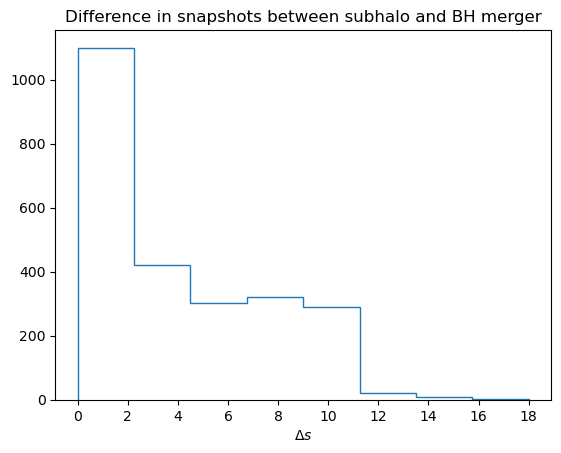

In [183]:
plt.hist(np.array(snap_subhalo_merger)-np.array(snap_bh_merger),histtype="step",bins=8)
plt.xticks(np.arange(0,20,2))
plt.title("Difference in snapshots between subhalo and BH merger")
plt.xlabel("$\Delta s$")
plt.show()

In [184]:
delta_s = np.array(snap_subhalo_merger)-np.array(snap_bh_merger)

In [191]:
np.sum(delta_s>2)/len(delta_s)

0.5539334955393349

In [187]:
np.sum(delta_s<2)

672

## fpID is not equal to -1, np is -1

There is a first progenitor associated with this subhalo of bh merger but it has no next progenitor. Check if it has a next progenitor in this snapshot

In [293]:
print_tree_details_for_bh_merger(tree,0)

SubhaloID: [20000000000002832]
FpID: [20000000000002833]
npID: [-1]
dID: [20000000000002831]
snap at BH merger: [16]


In [295]:
np.where(SubhaloID==20000000000002833)[0][0]

32869

In [296]:
print_tree_details(tree,32869)

SubhaloID: 20000000000002833
FpID: 20000000000002834
npID: -1
dID: 20000000000002832
snap at BH merger: 15


##### if not check the descendant in the nexr snapshot

In [298]:
np.where(SubhaloID==20000000000002831)[0][0]

32867

In [299]:
print_tree_details(tree,32867)

SubhaloID: 20000000000002831
FpID: 20000000000002832
npID: -1
dID: 20000000000002830
snap at BH merger: 17


In [300]:
np.where(SubhaloID==20000000000002830)[0][0]

32866

In [301]:
print_tree_details(tree,32866)

SubhaloID: 20000000000002830
FpID: 20000000000002831
npID: 20000000000002837
dID: 20000000000002829
snap at BH merger: 18


### Keep looking at the descendants until you find a merger. In this case the subhalos merge at snapshot 18!

## Special case: No subhalo found for bh merger!

In [302]:
tree_target_index = (SubfindID == merger_remnant_SubhaloID[527])&(SnapNum == merger_remnant_snap[527])
print(SubhaloID[tree_target_index],FirstProgenitorID[tree_target_index],NextProgenitorID[tree_target_index],DescendantID[tree_target_index],SnapNum[tree_target_index])

[] [] [] [] []


In [303]:
print_tree_details_for_bh_merger(tree,527)

SubhaloID: []
FpID: []
npID: []
dID: []
snap at BH merger: []


## However,

In [265]:
tree_target_index = (SubfindID == merger_remnant_SubhaloID[527])&(SnapNum == merger_remnant_snap[527]+1)
print(SubhaloID[tree_target_index],FirstProgenitorID[tree_target_index],NextProgenitorID[tree_target_index],DescendantID[tree_target_index],SnapNum[tree_target_index])

[30000000100001198] [30000000100001199] [-1] [30000000100001197] [16]


In [230]:
FirstProgenitorID[505679]

300000031000000004

In [231]:
print(SubhaloID[tree_target_index])

[300000031000000004]


The number of BH mergers in this run is 559


(<Figure size 500x300 with 1 Axes>,
 <Axes: title={'center': 'Mergers in BRAHMA'}, xlabel='z', ylabel='Number of mergers'>)

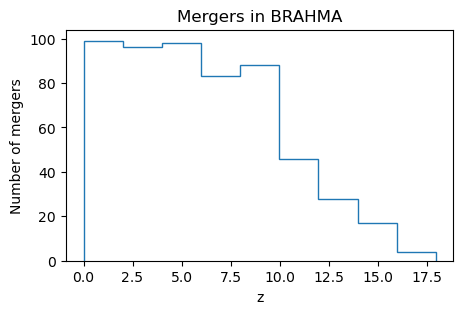

In [ ]:
merger_properties=np.load(basePath + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]
print(merger_properties.keys())
true_merger_flag  = np.array(merger_properties['merger_type'])==1
print("There are %d mergers in this run"%(np.sum(true_merger_flag)))
Nmergers = np.sum(true_merger_flag)

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])
There are 559 mergers in this run


In [42]:
snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)

In [41]:
snapshots = get_snapshots_to_bh_mergers(basePath)
merger_remnant_snap = []
merger_remnant_z = np.array(merger_properties['remnant_redshift'])[true_merger_flag]
merger_remnant_SubhaloID = np.array(merger_properties['remnant_SubhaloID'])[true_merger_flag]

for remnant_redshift in merger_remnant_z:
    idx = np.where(z_list == remnant_redshift)[0]
    merger_remnant_snap.append(snap_list[idx[0]])

In [43]:
tree=h5py.File(basePath+'postprocessing/tree_extended.hdf5','r')
SubfindID=tree.get('SubfindID')[:]
FirstProgenitorID=tree.get('FirstProgenitorID')[:]
NextProgenitorID=tree.get('NextProgenitorID')[:]
DescendantID=tree.get('DescendantID')[:]
SnapNum=tree.get('SnapNum')[:]
SubhaloID=tree.get('SubhaloID')[:]

In [ ]:
# find all cases where FpIDs = -1 
fpID_minus_1_count = 0
fpID_minus_1_npID_not_minus_1_count = 0
fpID_not_minus1_but_npID_minus1_count = 0


fpIDs_merger = []
npIDs_merger = []
snap_subhalo_merger = []
snap_bh_merger = []
remnant_subfind_bh_merger = []

no_merger = 0


for i in range(Nmergers):
    #print("Processing merger %d of %d"%(i+1,Nmergers))
    #tree_target_index = (SubfindID == merger_remnant_SubhaloID[i])&(SnapNum == merger_remnant_snap[i])
    #print(i)
    tree_target_index = np.where((SubfindID == merger_remnant_SubhaloID[i]) & (SnapNum == merger_remnant_snap[i]))
    if len(tree_target_index[0]) != 0:
        tree_target_index = tree_target_index[0][0]  
        fpID = FirstProgenitorID[tree_target_index]
        if fpID ==-1:
            fpIDs_merger.append(fpID)
            fpID_minus_1_count += 1
            npID = NextProgenitorID[tree_target_index]
            snap_bh_merger.append(merger_remnant_snap[i])
            remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
            if(npID != -1):
                fpID_minus_1_npID_not_minus_1_count += 1
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[tree_target_index])
            else:
                new_target_index = tree_target_index
                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #print("No descendant found for this merger")
                        no_merger += 1
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[new_target_index])

        else:
            #check if the npID is minus -1 at fp
            fpIndex = np.where(SubhaloID==fpID)[0][0]
            npID = NextProgenitorID[fpIndex]
            if npID == -1:
                fpID_not_minus1_but_npID_minus1_count += 1
                snap_bh_merger.append(merger_remnant_snap[i])
                remnant_subfind_bh_merger.append(merger_remnant_SubhaloID[i])
                new_target_index = tree_target_index
                while npID==-1:
                    descID = DescendantID[new_target_index]
                    if descID == -1:
                        #print("No descendant found for this merger")
                        no_merger += 1
                        break
                    else:
                        new_target_index = np.where(SubhaloID==descID)[0][0]
                        npID = NextProgenitorID[new_target_index]
                npIDs_merger.append(npID)
                snap_subhalo_merger.append(SnapNum[new_target_index])

print("There are %d BH mergers with fpIDs = -1"%(fpID_minus_1_count))
print("There are %d BH mergers with fpIDs = -1 and npIDs != -1"%(fpID_minus_1_npID_not_minus_1_count))   
print("There are %d BH mergers with fpIDs != -1 but npIDs = -1"%(fpID_not_minus1_but_npID_minus1_count))